In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

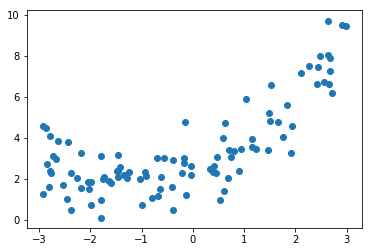

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression as LR

In [5]:
lr = LR()
lr.fit(X, y)
y_predict = lr.predict(X)

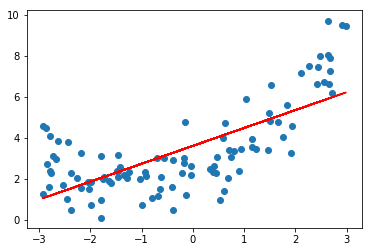

In [6]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

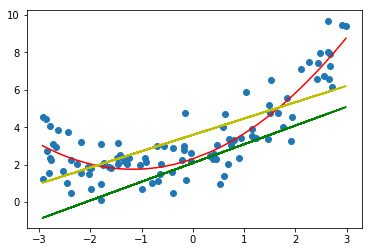

In [7]:
X2 = np.hstack([X, X**2])
lr2 = LR()
lr2.fit(X2, y)
y_predict2 = lr2.predict(X2)

y1 = x + 2 + np.random.normal(0, 1, size=100)
lr3 = LR()
lr3.fit(X, y1)
y_predict3 = lr3.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.plot(x, y_predict3, color='g')
plt.plot(x, y_predict, color='y')
plt.show()

### sklearn中的多项式回归

In [8]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [20]:
X2.shape

(100, 3)

In [21]:
X2[:5, :]

array([[ 1.        , -2.34626767,  5.50497196],
       [ 1.        , -0.70189924,  0.49266254],
       [ 1.        ,  2.9991381 ,  8.99482937],
       [ 1.        ,  1.59916577,  2.55733117],
       [ 1.        ,  0.65816644,  0.43318307]])

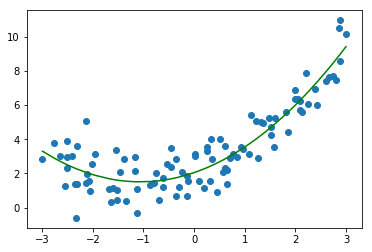

In [30]:
lr = LinearRegression()
lr.fit(X2, y)
y_predict = lr.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='g')
plt.show()

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X3 = poly.transform(X)

In [26]:
X3.shape

(100, 3)

In [27]:
X3[:2, :]

array([[ 1.        , -2.34626767,  5.50497196],
       [ 1.        , -0.70189924,  0.49266254]])

In [32]:
x = np.arange(1, 11)
X = x.reshape(-1, 2)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=10)

In [39]:
poly = PolynomialFeatures(degree=4)
poly.fit(X)
X3 = poly.transform(X)

In [40]:
X3.shape

(5, 15)

In [41]:
X3[:2, :]

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.,   1.,
          2.,   4.,   8.,  16.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.,  81.,
        108., 144., 192., 256.]])

### Pipeline

In [42]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [46]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [48]:
y_predict = poly_reg.predict(X)

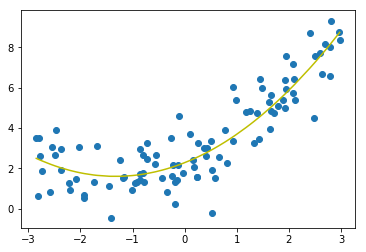

In [49]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='y')
plt.show()